### Importing required libraries 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

### Importing the flight booking dataset

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### 1) Plot the best suitable graph if the price varies with different airlines.

#### Line Plot

<AxesSubplot: xlabel='airline', ylabel='price'>

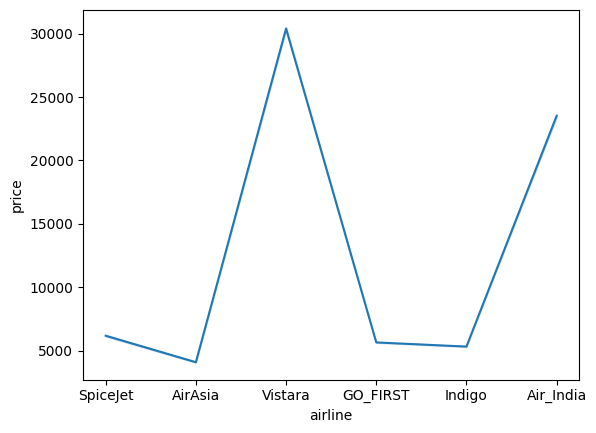

In [8]:
sns.lineplot(df['airline'],df['price'])

#### Bar Plot

<AxesSubplot: xlabel='airline', ylabel='price'>

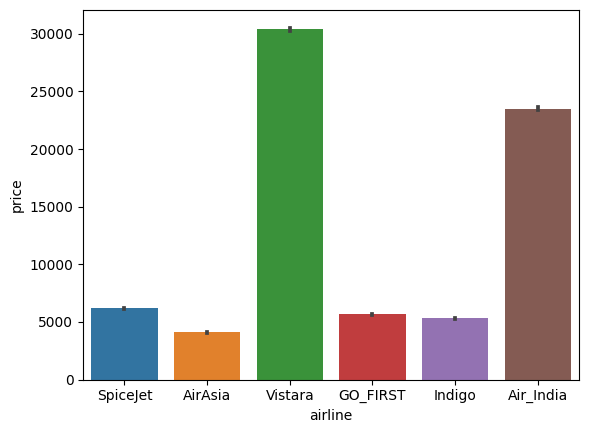

In [9]:
sns.barplot(df['airline'],df['price'])

**Insight-**
- Vistara is the most expensive airline in our dataset followed by Air India at the second spot

### 2) Is the price affected when tickets are bought just 1 or 2 days before departure?
### Show the stats in graphical form.

Text(0, 0.5, 'Flight Prices')

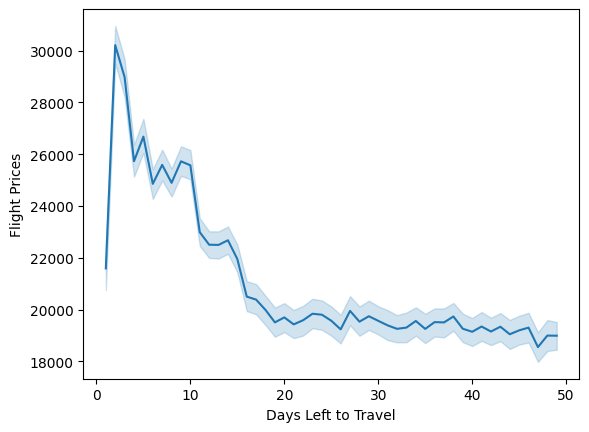

In [10]:
sns.lineplot(df['days_left'],df['price'])
plt.xlabel('Days Left to Travel')
plt.ylabel('Flight Prices')

<AxesSubplot: xlabel='days_left', ylabel='price'>

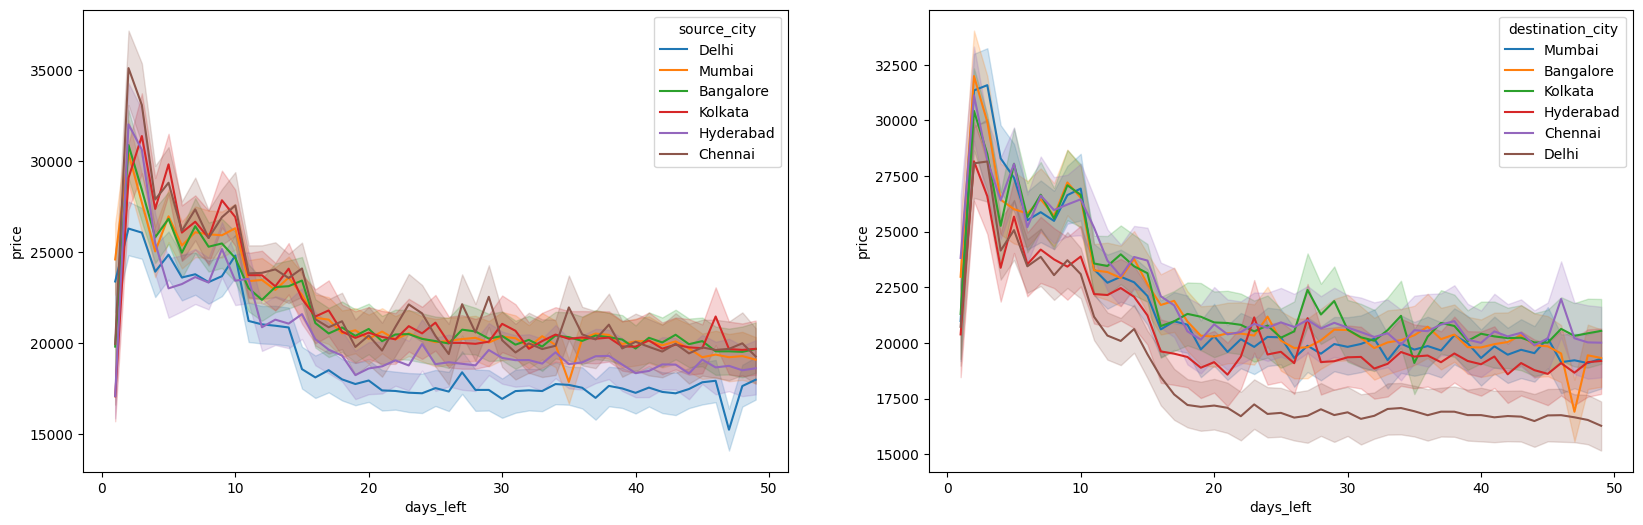

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(df['days_left'],df['price'],hue=df['source_city'],ax=ax[0])
sns.lineplot(df['days_left'],df['price'],hue=df['destination_city'],ax=ax[1])

**Insight-**
- Yes Days Left for departure do affect the prices for the flight
- Earlier the tickets booked lesser is the price for the flight

### 3) Which airline has been used by the most number of passengers ?

In [12]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<AxesSubplot: xlabel='airline', ylabel='count'>

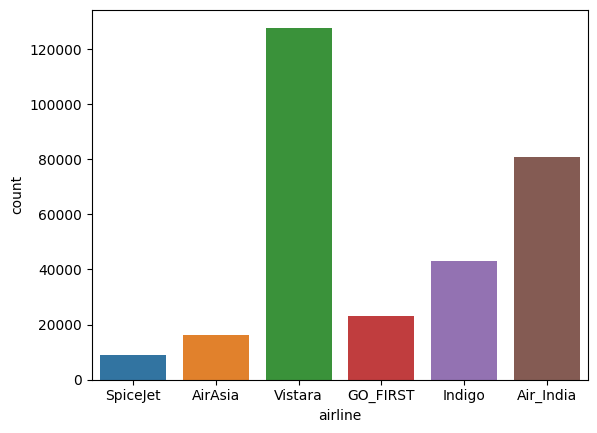

In [13]:
sns.countplot(df['airline'])

**Insight-**
- Vistara has been the most popular and used flight across the entire dataset

### 4) How does the ticket price vary between Economy and Business class for all airlines?
### Show the insights with the best suitable graph.

<AxesSubplot: xlabel='class', ylabel='price'>

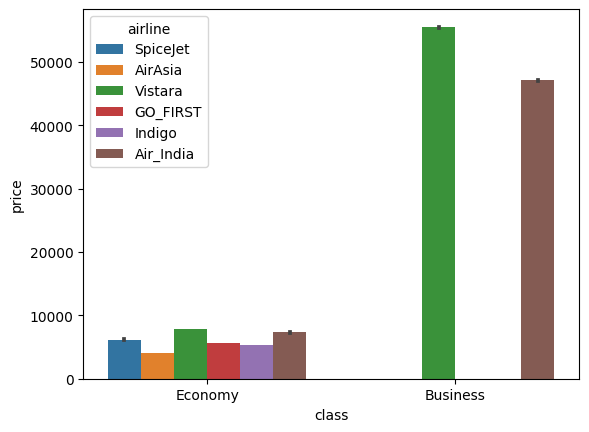

In [14]:
sns.barplot(df['class'],df['price'],hue = df['airline'])

### 5) How many passengers are travelling in business class on a direct flight ?

In [15]:
business = df.loc[(df['class'] == 'Business')]
business['stops'].value_counts()

one            84302
zero            8102
two_or_more     1083
Name: stops, dtype: int64

**Insight-**
- There are 8102 passengers having a direct flight travelling in business class

### 6) Which city has the lowest take off of flights ?

In [16]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

<AxesSubplot: xlabel='source_city', ylabel='count'>

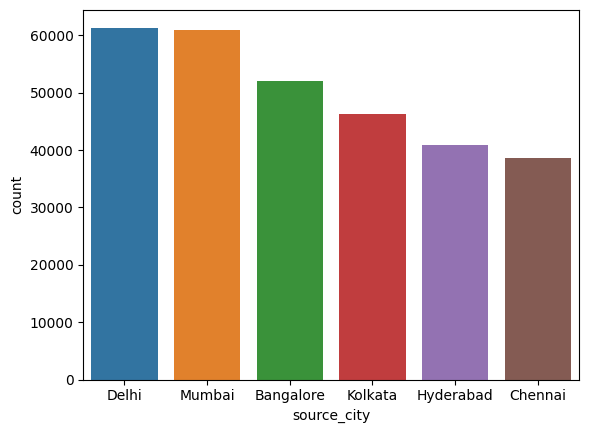

In [17]:
sns.countplot(df['source_city'])

**Insight-**
- Chennai has the lowest take offs of flights compare to other metro cities in the dataset

### 7) What is the average price of all airlines from Delhi to Mumbai ?


In [18]:
df1 = df.loc[(df['source_city']=='Delhi') & (df['destination_city']=='Mumbai')]
df1.describe()

,duration,days_left,price
count,15289.000000,15289.000000,15289.000000
mean,10.367774,25.828373,19355.829812
std,7.518482,13.675568,19777.253580
min,2.000000,1.000000,2281.000000
25%,3.830000,14.000000,4381.000000
50%,8.250000,26.000000,7262.000000
75%,15.170000,38.000000,36712.000000
max,30.080000,49.000000,95657.000000


**Insight-**
- Average fare price of flight from Delhi to Mumbai is 19355.82 INR

### 8) Convert all the attributes into integer data type which are of object data type except Flight column

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
new_df = df.copy()
le = LabelEncoder()
new_df['airline'] = le.fit_transform(new_df['airline'])
new_df['source_city'] = le.fit_transform(new_df['source_city'])
new_df['departure_time'] = le.fit_transform(new_df['departure_time'])
new_df['stops'] = le.fit_transform(new_df['stops'])
new_df['arrival_time'] = le.fit_transform(new_df['arrival_time'])
new_df['destination_city'] = le.fit_transform(new_df['destination_city'])
new_df['class'] = le.fit_transform(new_df['class'])

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [22]:
new_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


### 9) Which feature is highly dependent on the target variable ?

<AxesSubplot: >

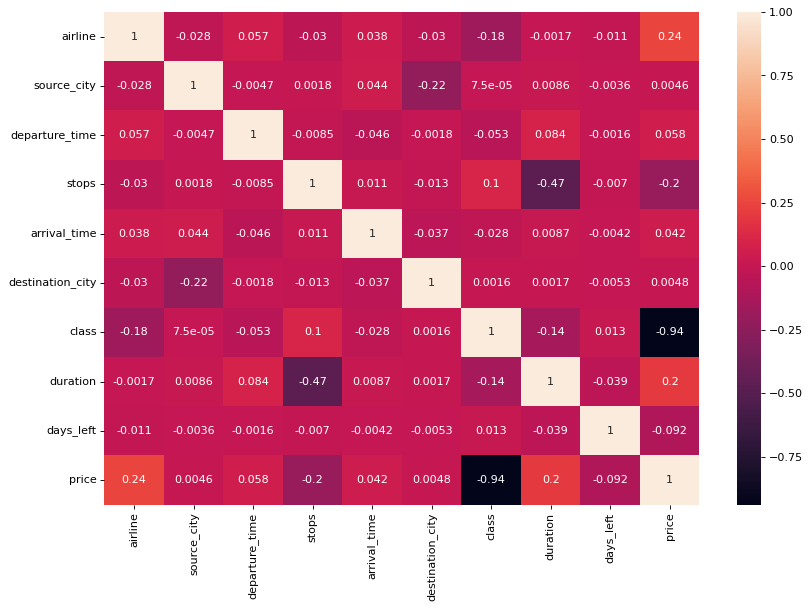

In [23]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
sns.heatmap(new_df.corr(),annot = True)

**Insight-**
- class, airline, stops & duration are the features which are highly corelated with the target variable

### VIF Calculation

In [24]:
col_list = []
for col in new_df.columns:
    if ((new_df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = new_df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


### Perform the following tasks for answering the remaining questions -
- Use airline, class, duration and days left as a feature.
- Split the dataset into a train and test of proportions 80:20 and set the random state to 0.
- Build a Multiple Linear regression model on the data.

In [25]:
X = new_df.loc[:,['airline','class','duration','days_left']]
Y = new_df.loc[:,'price']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(f"Train size - {x_train.shape}")
print(f"Test size - {x_test.shape}")

Train size - (240122, 4)
Test size - (60031, 4)


In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Model Building - Linear Regression 

In [32]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_pred = linear_model.predict(x_test)

### 10) Calculate the MSE, MAE, R-squared and RMSE

In [48]:
print(f"R2 Score for Linear regression is {round(r2_score(y_test,linear_pred)*100,2)} %")
print(f"MSE for Linear regression is {mean_squared_error(y_test,linear_pred)}")
print(f"MAE Score for Linear regression is {mean_absolute_error(y_test,linear_pred)}")
print(f"RMSE Score for Linear regression is {np.sqrt(mean_squared_error(y_test,linear_pred))}")

R2 Score for Linear regression is 89.77 %
MSE for Linear regression is 52291942.44383323
MAE Score for Linear regression is 4463.973594976443
RMSE Score for Linear regression is 7231.3167849177535


### 11) Plot the graph of Actual and Predicted Values

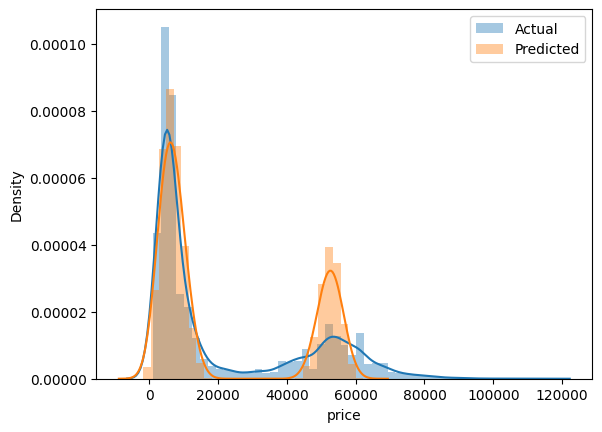

In [39]:
sns.distplot(y_test,label='Actual')
sns.distplot(linear_pred,label='Predicted')
plt.legend()

### 12) Implement Decision Tree and Random forest algorithm. Which one is best algorithm out of the three algorithms used on this dataset ?

### Model Building - Decision Tree Regressor

In [66]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [67]:
print(f"R2 Score for Decision Tree regressor is {round(r2_score(y_test,dt_pred)*100,2)} %")
print(f"MSE for Decision Tree regressorn is {mean_squared_error(y_test,dt_pred)}")
print(f"MAE Score for Decision Tree regressor is {mean_absolute_error(y_test,dt_pred)}")
print(f"RMSE Score for Decision Tree regressor is {np.sqrt(mean_squared_error(y_test,dt_pred))}")

R2 Score for Decision Tree regressor is 92.8 %
MSE for Decision Tree regressorn is 36799012.364207804
MAE Score for Decision Tree regressor is 3450.527912649149
RMSE Score for Decision Tree regressor is 6066.218951225533


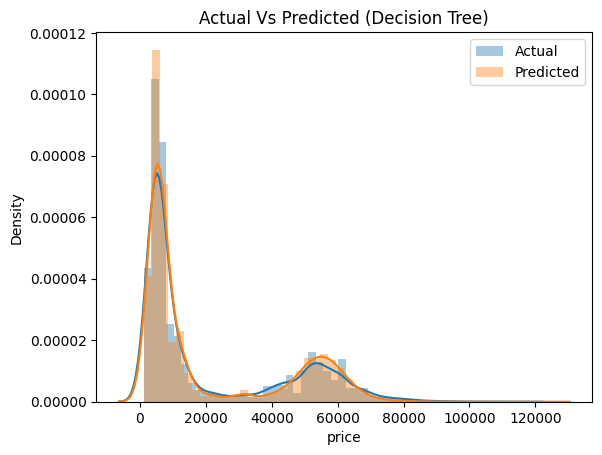

In [68]:
sns.distplot(y_test,label='Actual')
sns.distplot(dt_pred,label='Predicted')
plt.title('Actual Vs Predicted (Decision Tree)')
plt.legend()

### Hyperparameter tuning for Decision Tree Regressor

In [60]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {'max_depth': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 50, 5)}

# Define the decision tree classifier
dt = DecisionTreeRegressor()

# Define the grid search for hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance on the test set
test_acc = grid_search.score(x_test, y_test)
print("Test set accuracy: ", test_acc)

Best hyperparameters:  {'max_depth': 9, 'min_samples_leaf': 11}
Test set accuracy:  0.9461876809095802


### Model Building - Using Best Parameter for Decision Tree

In [69]:
dt_model = DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 11)
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [70]:
print(f"R2 Score for Tuned Decision Tree regressor is {round(r2_score(y_test,dt_pred)*100,2)} %")
print(f"MSE for Tuned Decision Tree regressorn is {mean_squared_error(y_test,dt_pred)}")
print(f"MAE Score for Tuned Decision Tree regressor is {mean_absolute_error(y_test,dt_pred)}")
print(f"RMSE Score for Tuned Decision Tree regressor is {np.sqrt(mean_squared_error(y_test,dt_pred))}")

R2 Score for Tuned Decision Tree regressor is 94.62 %
MSE for Tuned Decision Tree regressorn is 27515231.91224263
MAE Score for Tuned Decision Tree regressor is 3038.370428906507
RMSE Score for Tuned Decision Tree regressor is 5245.4963456514415


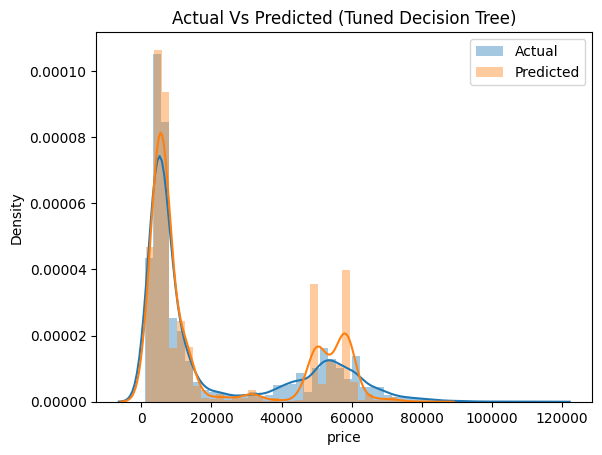

In [71]:
sns.distplot(y_test,label='Actual')
sns.distplot(dt_pred,label='Predicted')
plt.title('Actual Vs Predicted (Tuned Decision Tree)')
plt.legend()

### Model Building - Random Forest Regressor

In [54]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [55]:
print(f"R2 Score for Random Forest regressor is {round(r2_score(y_test,rf_pred)*100,2)} %")
print(f"MSE for Random Forest regressorn is {mean_squared_error(y_test,rf_pred)}")
print(f"MAE Score for Random Forest regressor is {mean_absolute_error(y_test,rf_pred)}")
print(f"RMSE Score for Random Forest regressor is {np.sqrt(mean_squared_error(y_test,rf_pred))}")

R2 Score for Random Forest regressor is 93.56 %
MSE for Random Forest regressorn is 32914052.37784549
MAE Score for Random Forest regressor is 3291.9098646351163
RMSE Score for Random Forest regressor is 5737.07698901152


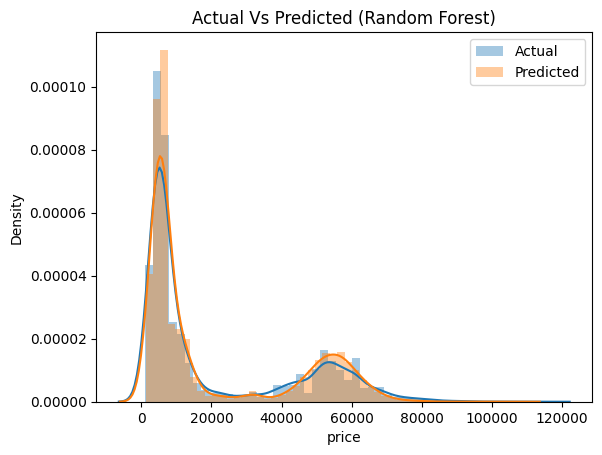

In [72]:
sns.distplot(y_test,label='Actual')
sns.distplot(rf_pred,label='Predicted')
plt.title('Actual Vs Predicted (Random Forest)')
plt.legend()

### Hyperparameter tuning for Random Forest Regressor

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train)
print(rf2.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
